In [8]:
# 단순 GET 요청
import requests
response = requests.get('http://news.naver.com/main/home.nhn')

In [9]:
response.status_code

200

In [10]:
html = response.text

In [11]:
response.headers['Content-Type']

'text/html;charset=EUC-KR'

In [12]:
response.encoding

'EUC-KR'

In [13]:
# 간단한 크롤링
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html.parser')
for tag in soup.select('a[href*=sectionList.nhn]'): # a tag에서 sectionList.nhn이라는 href 값을 찾는다.
    print(tag.text.strip()) # text 중에서 일부 공백을 제거한다.

상식in뉴스
'베이징 체류' 北김영철, 북미정상회담 조율차 뉴욕 향발
대법, 비트코인 재산가치 첫 인정…제도권 편입 근거 되나
지구촌 화제

남북관계와 한반도 정세

'박근혜·최순실' 국정농단 재판

MB 다스 의혹 등 검찰 수사

세월호 인양 그 후

각계 #미투 확산

커지는 미세먼지 위협

美 '트럼프 시대'

글로벌 경제 리포트

가상화폐 둘러싼 논란

부동산 시장 리포트

세계와 생각 나누기

김인수 기자의 사람이니까 경영이다
불공정 선거 보도 기사 모음


In [14]:
# GET 요청 시에 커스텀 Header 지정

request_headers = {
    'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 '
                   '(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'), # <-- 한줄이다
    'Referer': 'http://news.naver.com/main/home.nhn', # 뉴스홈
}
response = requests.get('http://news.naver.com/main/main.nhn', headers=request_headers)

In [15]:
response

<Response [200]>

In [18]:
# 동일 key의 GET 인자 지정
# http://httpbin.org/get --> 내가 http 요청을 제대로 했는지 알려주는 site

get_params = (('k1', 'v1'), ('k1', 'v3'), ('k2', 'v2'))
response = requests.get('http://httpbin.org/get', params=get_params)

In [17]:
response.json()

{'args': {'k1': ['v1', 'v3'], 'k2': 'v2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.18.4'},
 'origin': '211.249.69.177',
 'url': 'http://httpbin.org/get?k1=v1&k1=v3&k2=v2'}

In [19]:
# 사전형인 경우 동일 key의 GET 인자 지정을 허용하지 않는다.

get_params = dict([('k1', 'v1'), ('k1', 'v3'), ('k2', 'v2')])
response = requests.get('http://httpbin.org/get', params=get_params)

In [21]:
# 사전형의 key 중복을 허용하지 않으므로 결과 값의 key값이 중복 제거 되어진다.
response.json()

{'args': {'k1': 'v3', 'k2': 'v2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.18.4'},
 'origin': '211.249.69.177',
 'url': 'http://httpbin.org/get?k1=v3&k2=v2'}

In [24]:
# 상태코드 int형
response.status_code

200

In [27]:
# 상태코드 bool형
response.ok

True

In [28]:
# 응답헤더
response.headers.__class__ # dict 타입이 아니라 대소문자를 가리지 않는 다는 타입이다.

requests.structures.CaseInsensitiveDict

In [29]:
response.headers['Content-TYPE']

'application/json'

In [30]:
print(response.encoding)

None


In [36]:
# json 포맷의 응답일 경우
print(response.text) # body에서 문자열 응답
print(response.json()['args']) # Deserialize

{"args":{"k1":"v3","k2":"v2"},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Host":"httpbin.org","User-Agent":"python-requests/2.18.4"},"origin":"211.249.69.177","url":"http://httpbin.org/get?k1=v3&k2=v2"}

{'k1': 'v3', 'k2': 'v2'}


In [43]:
# 또 다른 방식이지만 위 방식이 더 간결해서 좋다.
import json
json.loads(response.text)['args']

{'k1': 'v3', 'k2': 'v2'}

In [48]:
# POST 요청
#data = {'J1':'V1', 'J2':'V2'}
data = [('J1','V1'),('J2','V2')]
response = requests.post('http://httpbin.org/post', data=data)
response.json() # form 값에서 확인됨

{'args': {},
 'data': '',
 'files': {},
 'form': {'J1': 'V1', 'J2': 'V2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Content-Length': '11',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.18.4'},
 'json': None,
 'origin': '211.249.69.177',
 'url': 'http://httpbin.org/post'}

In [51]:
# JSON 요청
import json
json_data = {'k1':'v1','k2':'v2','k3':[1,2,3], 'name':'제이비'}

# json 포맷 문자열로 변환 후, data인자로 지정
json_string = json.dumps(json_data)
response = requests.post('http://httpbin.org/post', data=json_string)
response.json()

{'args': {},
 'data': '{"k1": "v1", "k2": "v2", "k3": [1, 2, 3], "name": "\\uc81c\\uc774\\ube44"}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Content-Length': '71',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.18.4'},
 'json': {'k1': 'v1', 'k2': 'v2', 'k3': [1, 2, 3], 'name': '제이비'},
 'origin': '211.249.69.177',
 'url': 'http://httpbin.org/post'}

In [53]:
# 요즘은 json인자 지원해준대
response = requests.post('http://httpbin.org/post', json=json_string)
response.json()

{'args': {},
 'data': '"{\\"k1\\": \\"v1\\", \\"k2\\": \\"v2\\", \\"k3\\": [1, 2, 3], \\"name\\": \\"\\\\uc81c\\\\uc774\\\\ube44\\"}"',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Content-Length': '90',
  'Content-Type': 'application/json',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.18.4'},
 'json': '{"k1": "v1", "k2": "v2", "k3": [1, 2, 3], "name": "\\uc81c\\uc774\\ube44"}',
 'origin': '211.249.69.177',
 'url': 'http://httpbin.org/post'}

In [55]:
# 파일 업로드 요청
files = {
    'photo1':open('f1.jpg', 'rb'), # rb:read binery
    'photo2':open('f2.jpg', 'rb'), 
    'photo3':('f3.jpg',open('f3.jpg', 'rb'), 'image/jpeg',{'Expires':'0'})
}
post_params = {'k1':'v1'}
response = requests.post('http://httpbin.org/post',files=files, data=post_params)

{'args': {},
 'data': '',
 'files': {'photo1': 'data:application/octet-stream;base64,/9j/4AAQSkZJRgABAQEAYABgAAD/4RCERXhpZgAATU0AKgAAAAgABAE7AAIAAAAGAAAISodpAAQAAAABAAAIUJydAAEAAAAMAAAQcOocAAcAAAgMAAAAPgAAAAAc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
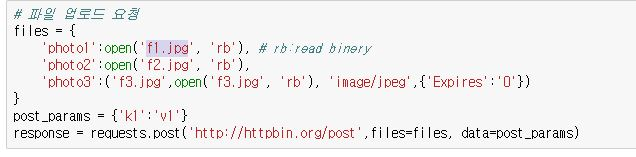

In [56]:
response.json()